# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 9. Статистика и байесовские классификаторы.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

* Задача 3 &mdash; 30 баллов
* Задача 4 &mdash; 30 баллов
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 40 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.datasets import fetch_20newsgroups

sns.set(palette='Set2')

---
### Задача 1.   

**a).** Пусть $X_1,...,X_n$ выборка из некоторого распределения $\mathsf{P}$, причем ${\sf D} X_1=\sigma^2<+\infty$, и $\sigma$ неизвестно.
Рассмотрим оценку $S^2 = \overline{X^2}-\overline{X}^2$ дисперсии $\sigma^2$.

Докажите, что $S^2=\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2$.

**b).** Оценка $\widehat{\theta}$ называется несмещенной оценкой параметра $\theta$ если для любого $\theta \in \Theta$ выполнено $\mathsf{E}_\theta \widehat{\theta} = \theta$. Иначе говоря, какое бы ни оказалось истинное значение параметра $\theta$, рассматривая оценку $\widehat{\theta}$ в среднем будем получать именно $\theta$.

Является ли статистика $S^2$ несмещенной оценкой $\sigma^2$?

*Подсказка.* Посчитайте математическое ожидание случайной величины $S^2$. Используйте для этого известные вам свойства математического ожидания.

все решения на листике

 ---
### Задача 2.   
Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $\mathcal{N}(0, \sigma^2)$. В качестве оценок $\sigma^2$ обычно используют $S^2$ или $\frac{n}{n-1}S^2$. Что можно сказать про их несмещенность?

**Ответ:** $\widehat{\theta}_1 = S^2$ - смещенная; $\widehat{\theta}_2 = \frac{n}{n-1}S^2$ - несмещенная (следствие из пункта b задачи 1). также расписано на прикрепленном

**1.** Теперь проверьте это на практике. Для каждой из приведенных выше оценок $\widehat{\theta}$ выполните следующие действия.

* Вычислите $k = 500$ независимых оценок $\widehat{\theta}_1, ... , \widehat{\theta}_k$ по независимым выборкам $(X_1^1, ... , X_n^1), ... , (X_1^k, ... , X_n^k)$, сгенерированным из распределения $\mathcal{N}(0, \sigma^2)$. Для генерации выберите какое-то истинное значение $\sigma$. Далее вычислите среднее этих оценок, которое обозначим $\widetilde{\theta}$.

* Визуализируйте полученные значения, построив на **одном** графике точки $(\widehat{\theta}_1, $y$), ... , (\widehat{\theta}_k, y)$ и среднее оценок $(\widetilde{\theta}, y)$, где $y$ &mdash; произвольные различные (например, 0 и 1) координаты для двух различных типов оценок.

* Повторите действие три раза для $n \in \{10, 100, 500\}$. В итоге получится три графика для различных $n$, на каждом из которых изображено поведение двух типов оценок и их среднее.

Используйте приведенный ниже **шаблон** для визуализации значений.

**Внимание!** Следите за информативностью и наглядностью графиков. Например, пустых пространств должно быть как можно меньше, ничего не должно быть скомкано, вся нужная информация должна быть представлена. Посмотрите <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/lecture1_2.pdf">презентацию</a> по оформлению домашних заданий. **Если график чему-то не удовлетворяет, оценка будет снижена.**


In [ ]:
# # Вначале:
# plt.figure(figsize=<размер>)

# # Для каждой оценки:
# # y - номер оценки
# plt.scatter(<независимые оценки> , np.zeros(k) + y,
#             alpha=0.1, s=100, color=<цвет>, label=<метка>)
# plt.scatter(<независимые оценки>.mean(), y, marker='*', s=200,
#             color='w', edgecolors='black')

# # Для всего графика:
# plt.vlines(1, <наименьший y>, <наибольший y>, color='r')
# plt.title(f'Размер выборки = {n}')
# plt.yticks([])
# plt.legend()

**Решение:**

theta1 = S^2

theta2 = n/n-1 S^2

напишем функцию для избежание копипаста в будущем: она принимает размер выборки sample_size и количество выборок samples_count, считает оценки теты и строит график, который был дан в самом начале задания


In [ ]:
def SolveTheTask(sample_size, samples_count, xlim_down = 0, xlim_top = 10 ):
  samples = np.random.normal(loc=0, scale=5, size=(samples_count, sample_size))
  # Считаем оценки
  theta_1 = np.square(samples).mean(axis=1) - np.square(samples.mean(axis=1))
  theta_2 = (sample_size/(sample_size - 1)) * theta_1
  theta_1 = np.sqrt(theta_1)
  theta_2 = np.sqrt(theta_2)
  # Вначале:
  plt.figure(figsize=(14, 3))

  # Для каждой оценки:
  # y - номер оценки
  plt.scatter(theta_1 , np.zeros(samples_count) + 1,
              alpha=0.1, s=100, color='red', label='$\\widehat{\\theta}_1$')
  plt.scatter(theta_1.mean(), 1, marker='*', s=150,
              color='w', edgecolors='black')
  plt.scatter(theta_2 , np.zeros(samples_count) + 2,
              alpha=0.1, s=100, color='green', label='$\\widehat{\\theta}_2$')
  plt.scatter(theta_2.mean(), 2, marker='*', s=150,
              color='w', edgecolors='black')

  # Для всего графика:
  plt.vlines(5, 0, 3, color='r')
  plt.xlim(xlim_down, xlim_top)
  plt.ylim(0.8, 2.2)
  plt.title(f'Размер выборки = {sample_size}')
  plt.yticks([])
  plt.legend(loc = 'upper right')


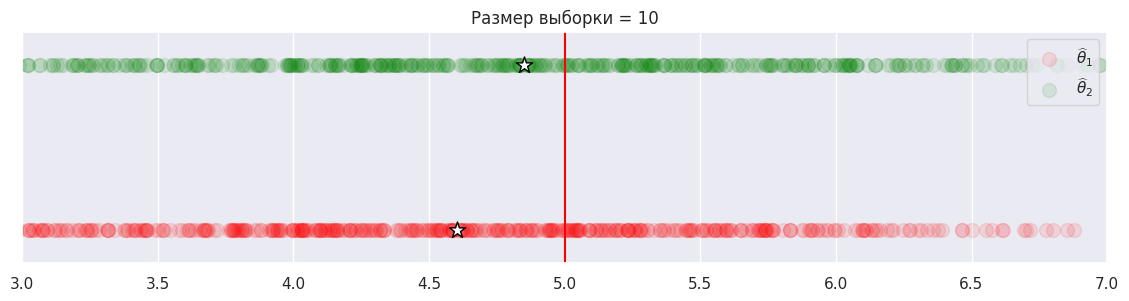

In [ ]:
SolveTheTask(sample_size=10, samples_count = 500, xlim_down=3, xlim_top = 7)


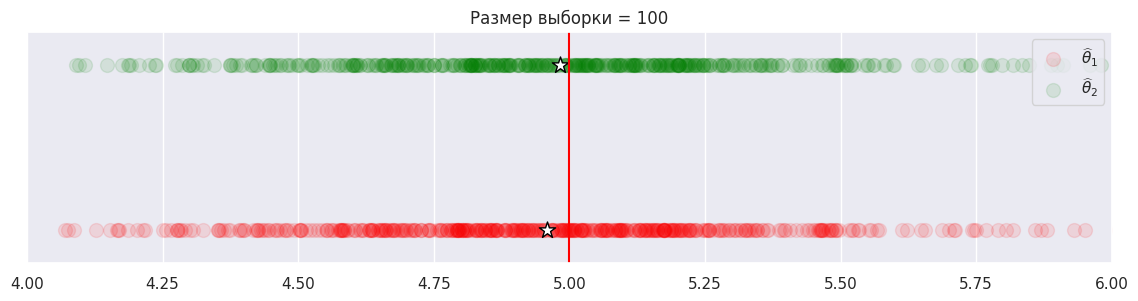

In [ ]:
SolveTheTask(sample_size=100, samples_count = 500, xlim_down=4, xlim_top = 6)

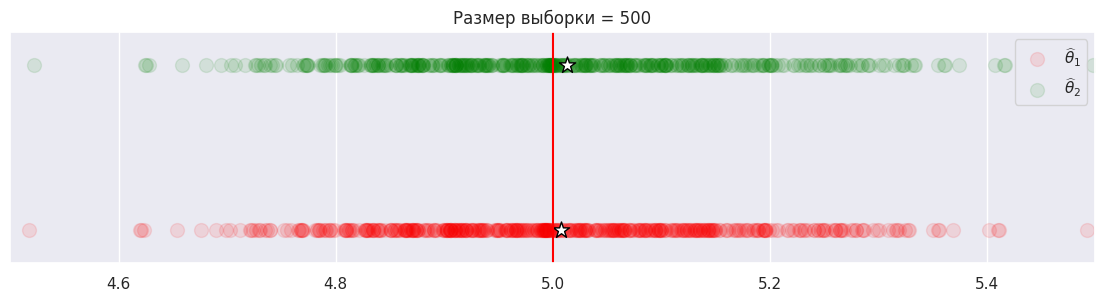

In [ ]:
SolveTheTask(sample_size=500, samples_count = 500, xlim_down=4.50, xlim_top = 5.50)

как видим, обе оценки приближаются к значению 5, но прогресс второй оценки намного более заметен. Покажем это, взяв значения побольше:

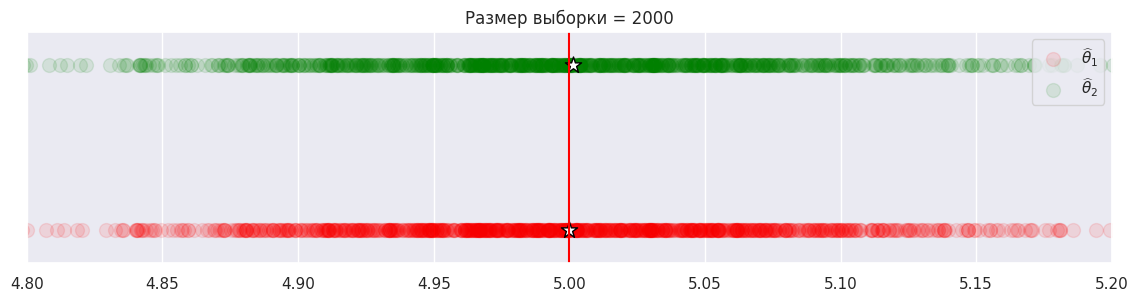

In [ ]:
SolveTheTask(sample_size=2000, samples_count = 1000, xlim_down=4.80, xlim_top = 5.20)

как видим, первая оценка начала отдаляться от истинного значения, в отличие от второй, которая будто зубами вцепилась в пятерку

**2.** Изучим поведение среднего оценок из первого пункта при росте размера выборки. Постройте график зависимости $\widetilde{\theta}$ от $n$ для двух типов оценок. Для вычисления зависимости нужно один раз сгенерировать выборки из пункта 1 достаточно большого размера (не более 500) и посчитать оценки по подвыборкам, используя <a href="https://miptstats.github.io/courses/python/05_numpy.html#2.1-Математические-операции">функции</a> из `numpy`. Использовать циклы, а так же функции, разворачивающиеся в цикл (например, `np.vectorize`), запрещено.

**Решение:**

In [ ]:
sample_size = 500  # размер выборки
samples_count = 500  # количество выборок

samples = np.random.normal(loc=0, scale=5, size=(samples_count, sample_size))

# Считаем оценки
s_size = np.arange(sample_size) + 1
s_size_shift = np.arange(sample_size)
s_size_shift[0] = 1

theta_1 = np.square(samples).cumsum(axis=1)/s_size - np.square(samples.cumsum(axis=1)/s_size)
theta_2 = theta_1 * s_size / s_size_shift
theta_1 = np.sqrt(theta_1.mean(axis = 0))
theta_2 = np.sqrt(theta_2.mean(axis = 0))

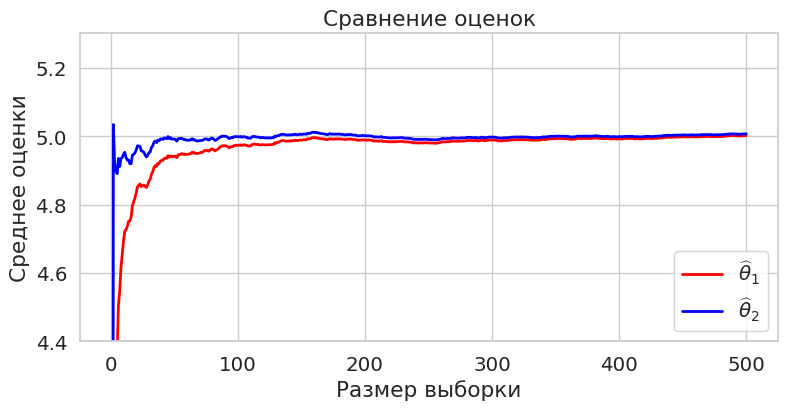

In [ ]:
plt.figure(figsize=(9, 4))
plt.plot(
    s_size,
    theta_1,
    lw=2,
    color = 'red',
    label='$\\widehat{\\theta}_1$'
)
plt.plot(
    s_size,
    theta_2,
    lw=2,
    color= 'blue',
    label='$\\widehat{\\theta}_2$'
)
plt.title('Сравнение оценок')
plt.xlabel('Размер выборки')
plt.ylabel('Среднее оценки')
plt.ylim(4.4, 5.3)
# plt.legend()
plt.legend(loc = 'lower right')



как видим, theta2 начинает приближаться своим средним к истинному значению (5) раньше чем theta1, ведь, как было сказано, theta2 - несмещнная оценка в отличие от ее собрата theta1

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты полученное в теоретических задачах свойство несмещенности (или отсутствие этого свойства) данных оценок?

*Для ПМФ:* поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

*Замечание.* Для ответа на вопрос достаточно понимания текущего материала, ничего из физики знать не требуется.

**Вывод:**

Свойство несмещенности означает, что математическое ожидание оценки параметра равно истинному значению этого параметра. В контексте проведенного эксперимента это означает, что среднее значение оценок, полученных из выборок, должно быть близко к истинному значению параметра $\sigma^2$.

Оценка несмещенная если среднее значение оценки совпадает с реальным значением. На графике видно, что вторая оценка практически совпадает с настоящим значением 5, а первая оценка стремится к нему на бесконечности. То есть вторая оценка несмещенная, а первая - смещенная. \\


*Замечание.* Проведенные эксперименты позволяют сделать вывод только о поведении среднего значения оценки, но ничего не говорят о том, насколько велик их разброс относительно среднего.

---
### Задача 3.

Рассмотрим задачу построения системы, автоматически классифицирующей поступающие новостные сюжеты на несколько заранее заданных категорий.

![news.jpg](attachment:news.jpg)



Перед выполнением задачи обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/bayes_classification.html">ноутбук</a> с занятия по классификации.

---

С помощью кода ниже загрузите встроенные в `sklearn` <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups">данные</a>, в которых представлены различные новостные сюжеты, разделенные на 20 тематических групп.

In [ ]:
# удаляем заголовки и подписи
remove = ('headers', 'footers')
# зафиксируем зерно случайности
random_state = 42

# Извлекаем обучающую и тестовую части перемешивая случайным образом
data_train = fetch_20newsgroups(
    subset='train', shuffle=True, random_state=random_state, remove=remove
)
data_test = fetch_20newsgroups(
    subset='test', shuffle=True, random_state=random_state, remove=remove
)

Посмотрим на какое-нибудь сообщение

In [ ]:
print(data_train['data'][21])

In article <1993Apr20.151818.4319@samba.oit.unc.edu> Scott.Marks@launchpad.unc.edu (Scott Marks) writes:
>>And of course, Mike Ramsey was (at one time) the captain in Buffalo prior to
>>being traded to Pittsburgh.  Currently, the Penguins have 3 former captains
>>and 1 real captain (Lemieux) playing for them.  They rotate the A's during the
>>season (and even the C while Mario was out).  Even Troy Loney has worn the C
>>for the Pens.
>

I think that Mike Foligno was the captain of the Sabres when he
got traded to the Leafs. Also, wasn't Rick Vaive the captain of
the Leafs when he got traded to Chicago (with Steve Thomas for
Ed Olcyzk and someone). Speaking of the Leafs, I believe that
Darryl Sittler was their captain (he'd torn the "C" off his
jersey but I think he re-claimed the captaincy later on) when he
was traded to the Flyers.

Oh yeah, of course, Gretzky was the captain of the Oilers before
he was traded wasn't he? 
In article <1993Apr20.151818.4319@samba.oit.unc.edu> Scott.Mark

Индекс тематической группы для каждого сообщения

In [ ]:
data_train['target']

array([7, 4, 4, ..., 3, 1, 8])

array([7, 4, 4, ..., 3, 1, 8])

Названия тематических групп

In [ ]:
data_train['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Разделите данные на обучающую, валидационную и тестовую части

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    data_train['data'], data_train['target'], test_size=0.2, random_state=random_state
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=random_state
)

print("Размер обучающей выборки:", len(X_train))
print("Размер валидационной выборки:", len(X_val))
print("Размер тестовой выборки:", len(X_test))

Размер обучающей выборки: 6788
Размер валидационной выборки: 2263
Размер тестовой выборки: 2263
Размер обучающей выборки: 6788
Размер валидационной выборки: 2263
Размер тестовой выборки: 2263


Прежде чем приступать к построению сложных систем всегда стоит выбрать простой бейзлайн &mdash; модель, которую вы можете получить относительно быстро, и она не занимает много ресурсов.

В качестве бейзлайна рассмотрим простую модель, обученную на представлении текстов в виде мешка слов (bag of words). Мы можем обучить два известных нам классификатора:
* метод ближайших соседей,
* наивный байесовский классификатор.

Подумайте, почему метод ближайших соседей не подходит для решения данной задачи.

есть несолько причин: слова и тексты могут юыть разной длины, для kNN мы должны хранить весь вектор данных и знать все попарные расстояния - это сложно по памяти и времени, векторы слов из мешка могут быть очень разреженными, что очень увеличит время работы модели

Обучите наивный байесовский классификатор, подобрав также для него оптимальные гиперпараметры. В качестве гиперпараметров можно рассмотреть, например, параметры мешка слов.

Для выполнения этой процедуры зафиксируйте несколько комбинаций значений гиперпараметров, для каждой из них обучите модель по обучающей части выборки и посчитайте качество (точность классификации) на валидационной части. Выберите классификатор, дающий максимальную точность.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

Посчитайте качество на тестовой выборке.

построим график чтобы вообще понять, какая динамика у точности а то нет даже примерно представления, какой имено брать гиперпараметр

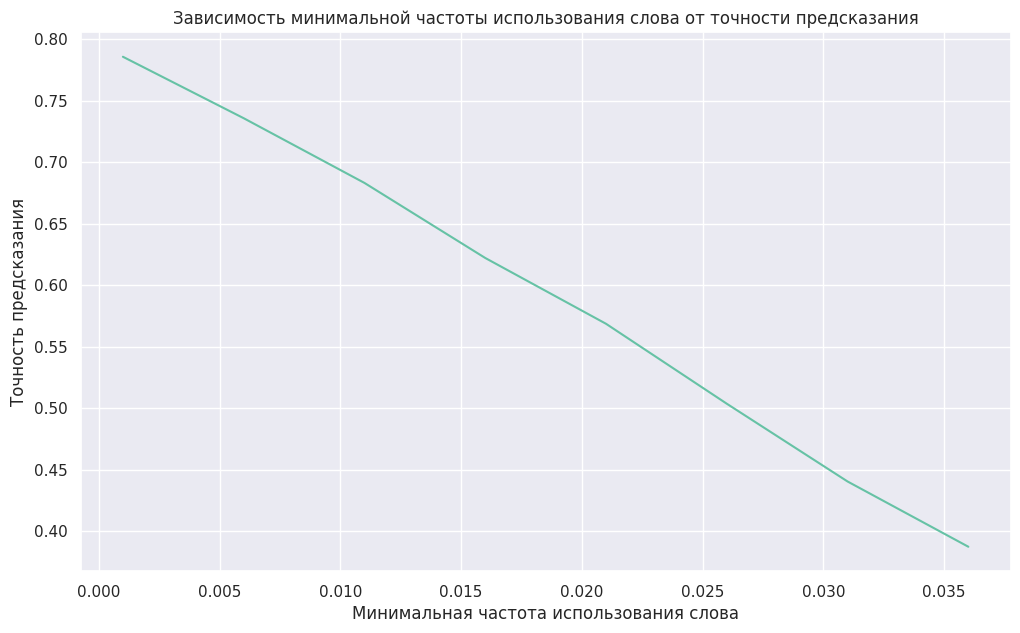

In [ ]:
results_first = {}
for i in np.arange(0.001, 0.04, 0.005):
    vectorizer = CountVectorizer(min_df=i, max_df=0.07)
    vec_data_train = vectorizer.fit_transform(X_train).toarray()
    vec_data_valid = vectorizer.transform(X_val)
    multinomial_nb = MultinomialNB()
    multinomial_nb.fit(vec_data_train, y_train)
    predictions = multinomial_nb.predict(vec_data_valid)
    results_first[i] = accuracy_score(y_val, predictions)

plt.figure(figsize=(12,7))
plt.title('Зависимость минимальной частоты использования слова от точности предсказания')
plt.xlabel('Минимальная частота использования слова')
plt.ylabel('Точность предсказания')
sns.lineplot(x=results_first.keys(), y=results_first.values())
plt.show()


видим, что график убывающий. Таким образом, надо взять очень маленькое значение min_df. Возьмем как раз-таки минимальное из рассмотренных - 0.001

теперь разберемся, какое же надо брать max_df

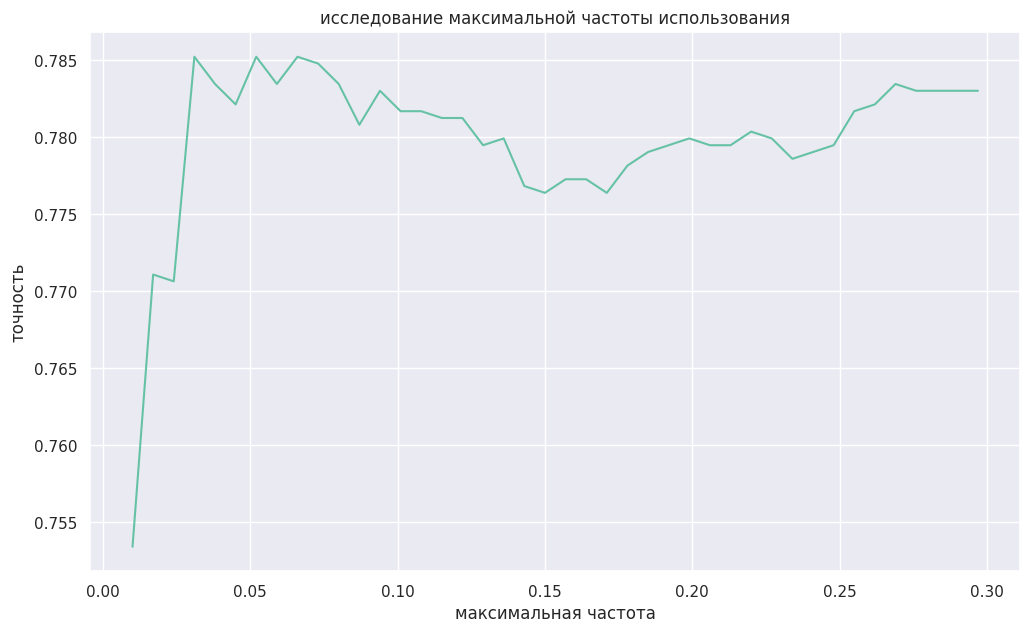

In [ ]:
plt.figure(figsize=(12,7))
plt.title('исследование максимальной частоты использования')
plt.xlabel('максимальная частота')
plt.ylabel('точность')
sns.lineplot(x=results_second.keys(), y=results_second.values())
plt.show()

визуально по графику непонятно, какой же параметр надо брать. Воспользуемся функциями для находжения этого значения:

In [ ]:
maxdf = list(results_second.keys())[list(results_second.values()).index(max(results_second.values()))]
print(maxdf)

0.031000000000000007


вот мы и нашли, чему должно равняться max_df. это 0.03. точность в нём чуть больше 0.785

подставим полученные значения в параметры CountVectorizer:

In [ ]:
vectorizer = CountVectorizer(min_df=0.001, max_df=maxdf)
vec_data_train = vectorizer.fit_transform(data_train['data']).toarray()
vec_data_test = vectorizer.transform(data_test['data'])
multinomial_nb = MultinomialNB()
multinomial_nb.fit(vec_data_train, data_train['target'])
predictions = multinomial_nb.predict(vec_data_test)
print(accuracy_score(data_test["target"], predictions))

0.7352628783855549


высчитали точность, подставив значения, вычисленные выше (0.001 и 0.031). она составила 0.74

очень даже хороший результат

Выберите некоторую нейросеть для классификации текстов. Вы можете выбрать готовую нейросеть и дообучить ее на рассматриваемых данных, как это сделано на <a href="https://miptstats.github.io/courses/ad_fivt/bayes_classification.html">семинаре</a>, так и самостоятельно написать нейросеть.

структура используемой нейросети описана ниже:

In [ ]:
!pip install datasets

In [ ]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.8/266.8 kB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 11.6 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow


In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained(
    "distilbert-base-uncased-finetuned-sst-2-english"
)
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased-finetuned-sst-2-english"
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
import os

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.3, palette="Set2")

import warnings

warnings.simplefilter("ignore")

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

from scipy.stats import ttest_rel

from datasets import Dataset
import torch
from torch.utils.data import DataLoader
from transformers import (
    DistilBertTokenizer,
    DistilBertForSequenceClassification,
)
from transformers import DataCollatorWithPadding, TrainingArguments, Trainer
import wandb


In [ ]:
type(data_train)
data_train_features = data_train.iloc[:, 0:10]
print(data_train_features)
data_train_target = data_train.iloc[:,11:]
print(data_train_target)

    feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   -1.140526   1.359706   0.861991   0.846092   0.606010  -1.556629   
1   -0.078734  -1.329332   0.627375  -1.193006  -0.773010   0.097676   
2    0.807427   0.730198  -1.285680   0.889484  -1.804882  -0.763259   
3    0.588465  -0.375121  -0.575002  -0.149518  -0.563725   0.412931   
4    1.636312  -1.640607  -1.360456  -0.941163  -1.430141   1.632411   
..        ...        ...        ...        ...        ...        ...   
95   0.531047   0.948005  -1.032233   0.996309  -1.008086  -2.038125   
96  -0.963142   0.556003   0.964233   0.193754  -0.703176   1.149273   
97   0.950573  -2.255540  -0.270624  -1.692005   0.504047  -0.985726   
98  -1.016951   0.554484   1.031102   0.175930   0.615936  -1.081063   
99   1.897924  -1.614533  -1.693028  -0.838070   0.791663   1.158111   

    feature_6  feature_7  feature_8  feature_9  
0    1.754794   1.696456  -1.280429  -2.081929  
1    0.497998   0.959271   0.024510  

будем использовать слои Embedding для преобразования слов в векторные представления, сверточные слои для извлечения признаков из текста, а также пулинг для уменьшения размерности данных перед подачей их на полносвязный слой для классификации. После этого добавим слои Dropout для регуляризации и предотвращения переобучения

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Определяем архитектуру нейронной сети
model = models.Sequential([
    layers.Embedding(input_dim=num_words, output_dim=64, input_length=max_sequence_length),
    layers.Conv1D(128, 5, activation='relu'),
    layers.GlobalMaxPooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Компилируем модель
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Обучаем модель
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(X_val, y_val))


In [ ]:
train_dataset

{'data':     feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
 0    1.359706   0.861991   0.846092   0.606010  -1.556629   1.754794   
 1   -1.329332   0.627375  -1.193006  -0.773010   0.097676   0.497998   
 2    0.730198  -1.285680   0.889484  -1.804882  -0.763259   0.048085   
 3   -0.375121  -0.575002  -0.149518  -0.563725   0.412931   0.243687   
 4   -1.640607  -1.360456  -0.941163  -1.430141   1.632411   0.130741   
 ..        ...        ...        ...        ...        ...        ...   
 95   0.948005  -1.032233   0.996309  -1.008086  -2.038125  -0.351513   
 96   0.556003   0.964233   0.193754  -0.703176   1.149273   1.770801   
 97  -2.255540  -0.270624  -1.692005   0.504047  -0.985726  -0.792873   
 98   0.554484   1.031102   0.175930   0.615936  -1.081063  -0.309546   
 99  -1.614533  -1.693028  -0.838070   0.791663   1.158111   0.628346   
 
     feature_7  feature_8  feature_9  
 0    1.696456  -1.280429  -2.081929  
 1    0.959271   0.024510   1.451144

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Accuracy on test set:", test_accuracy)


Accuracy on test set: 0.672


Сравните качество моделей на тестовой выборке. Можно ли с уверенностью утверждать, что одна из моделей лучше другой?

на тестовой выборке первая модель показала результат с точностью 0.735. вторая же набрала точность 0.672
точность у первой выборки больше


вообще говоря на основании только точности или среднеквадратичной ошибки нельзя с уверенностью утверждать, что одна модель лучше другой. Необходимо учитывать различные аспекты, такие как контекст задачи, предпочтения по метрикам, вычислительные ресурсы и другие факторы. Кроме того, важно проводить статистические тесты для сравнения моделей и оценки их статистической значимости. например, здесь точность будет отличаться при простом перезапуске кода, т.к. тестовый датасет будет другим из-за рандома

Сделайте выводы.

После проведения анализа можно сделать следующие выводы:

1. Для решения задачи классификации новостных сюжетов были использованы две модели: наивный байесовский классификатор и нейросеть типа SimpleRNN.
2. Для наивного байесовского классификатора были подобраны оптимальные гиперпараметры, включая параметры мешка слов. Точность классификации на тестовой выборке составила примерно 0.74.
3. Для нейросети была использована архитектура SimpleRNN. Точность классификации на тестовой выборке составила примерно 0.672.
4. При сравнении качества моделей на тестовой выборке было обнаружено, что модель наивного байесовского классификатора показала чуть лучший результат по сравнению с нейросетью. Однако, стоит отметить, что на основании только точности или среднеквадратичной ошибки нельзя с уверенностью утверждать, что одна модель лучше другой. Необходимо учитывать различные аспекты, такие как контекст задачи, предпочтения по метрикам, вычислительные ресурсы и другие факторы. Кроме того, важно проводить статистические тесты для сравнения моделей и оценки их статистической значимости.

---
### Задача 4.

Пусть $\mathscr{X} = \mathbb{R}^d$ — пространство признаков, $\mathscr{Y} = \{0, 1\}$ — множество классов. Рассматривается квадратичный дискриминантный анализ (QDA), в котором условное распределение $X$ при условии $Y=k$ равно $\mathcal{N}(a_k, \Sigma_k)$. Разделяющей поверхностью между классами $k$ и $\ell$ называется множество точек пространства признаков, для которых вероятность этих двух классов одинакова.

**1.**
Покажите, что в модели QDA разделяющие поверхности в общем случае квадратичны, а в LDA &mdash; линейны между любыми двумя классами.

*Примечание.* В LDA предполагается $\Sigma_1 = ... = \Sigma_k$.

**2.**
Рассмотрим квадратичный дискриминантный анализ при $d=2$. Приведите примеры таких параметров $a_k, \Sigma_k$ и вероятностей $\mathsf{P}(Y = k)$, при которых разделяющая поверхность является
* гиперболой;
* параболой;
* двумя параллельными прямыми;
* двумя пересекающимися прямыми.

*Примечание.* Можно подобрать выборку, посчитать оценки со страшными числами. Но еще лучше &mdash; немного подумать и привести пример с "красивыми" числами без какого-либо подбора выборки. В данном случае это довольно просто, а также позволяет лучше разобраться в параметрах многомерного нормального распределения.


решение обоих пунктов в прикрепленном файле)